# Plot Time
This function will plot the n_count of a population vs. the time it was recorded.
Load the popcycle package first. Then using the "Scope 1" example data included in the github package, assign paths to `db`, `opp.dir`, and `vct.dir`.

In [1]:
library(popcycle)

Loading required package: RSQLite
Loading required package: DBI
Loading required package: splancs
Loading required package: sp

Spatial Point Pattern Analysis Code in S-Plus
 
 Version 2 - Spatial and Space-Time analysis

Loading required package: plyr
Loading required package: uuid
Loading required package: tools


## Option 1: Requires cruise files

In [2]:
path <- "/Users/John/Documents/Armbrust/"
cruise <- "SCOPE_1"
db <- paste0(path,cruise,"/",cruise,".db")
opp.dir <- paste0(path,cruise,"/",cruise,"_opp")
vct.dir <- paste0(path,cruise,"/",cruise,"_vct")

## Option 2: Requires Server Access

In [28]:
path <- "/Volumes/data/data/seaflow/refilter/"
cruise <- "SCOPE_1"
db <- paste0(path,cruise,"/",cruise,".db")
opp.dir <- paste0(path,cruise,"/",cruise,"_opp")
vct.dir <- paste0(path,cruise,"/",cruise,"_vct")

### LOAD THIS FUNCTION

In [3]:
plot.time <- function(db, population, upper.limit, lower.limit) {
    table <- get.stat.table(db)
    population.list <- subset(table, pop == population)
    population.list.filtered <- population.list[(population.list$n_count < upper.limit),]
    population.list.filtered <- population.list.filtered[(population.list.filtered$n_count > lower.limit),]
    time.stat <- as.POSIXct(population.list.filtered$time, format = "%FT%T", tz = "GMT")
    pop.count <- population.list.filtered$n_count 
    plot(time.stat, pop.count, xlab="Time", ylab="Cell Count")
} 

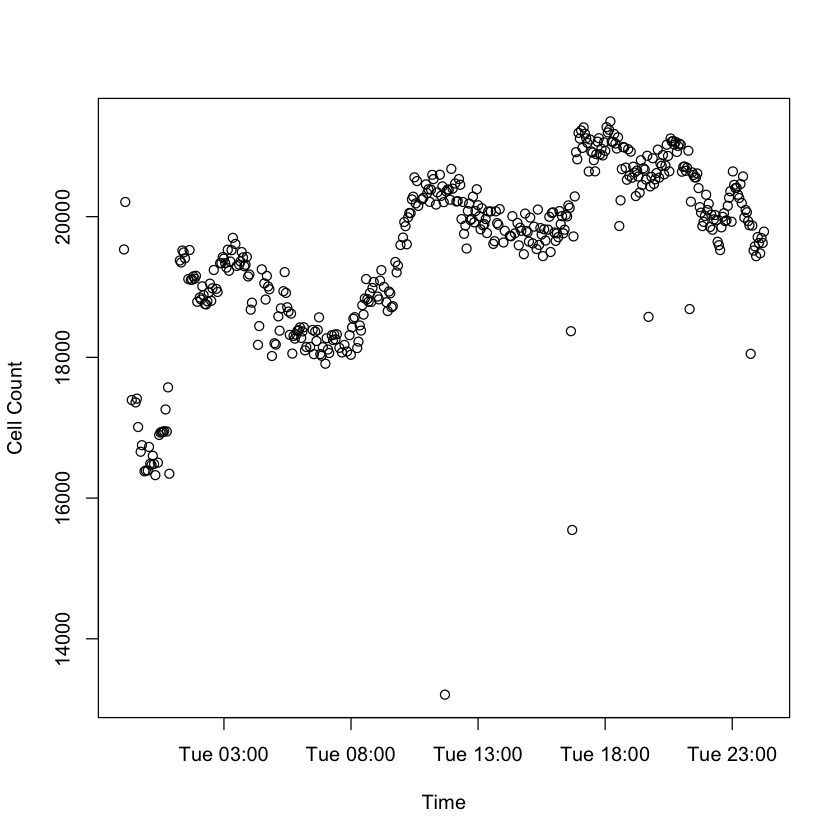

In [4]:
p1 <- plot.time(db, "prochloro", 30000, 13000)

## Changing Cruises
Requires server access

In [6]:
cruise <- "SCOPE_2"
db <- paste0(path,cruise,"/",cruise,".db")
opp.dir <- paste0(path,cruise,"/",cruise,"_opp")
vct.dir <- paste0(path,cruise,"/",cruise,"_vct")

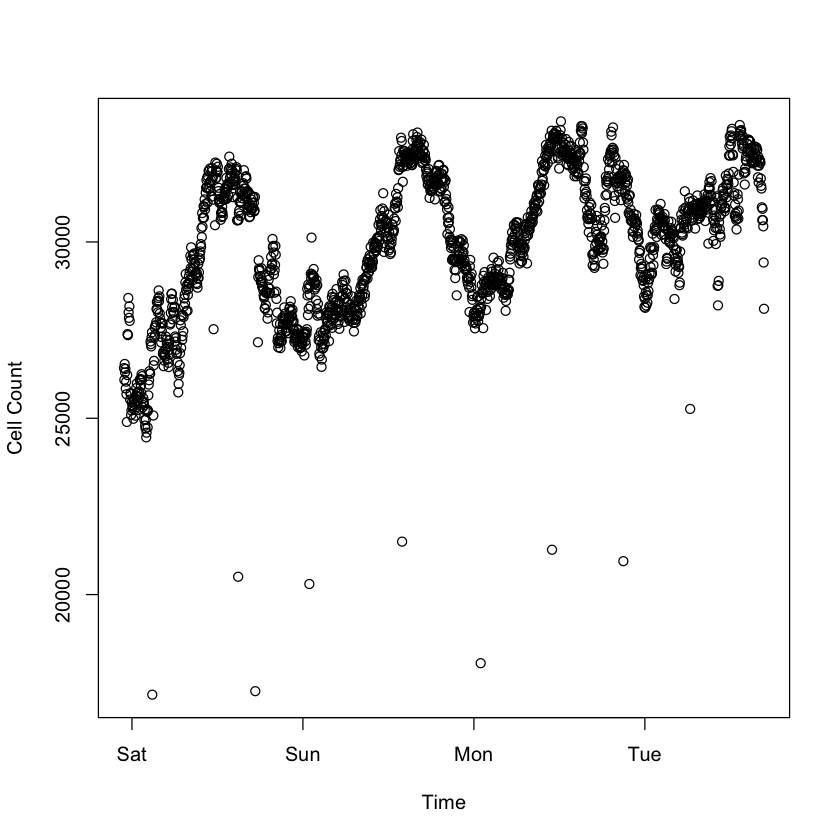

In [10]:
p2 <- plot.time(db, "prochloro", 45000, 15000)

In [27]:
cruise <- "SCOPE_3"
db <- paste0(path,cruise,"/",cruise,".db")
opp.dir <- paste0(path,cruise,"/",cruise,"_opp")
vct.dir <- paste0(path,cruise,"/",cruise,"_vct")

In [26]:
plot.time(db, "prochloro", 45000, 22000)

ERROR: Error in .local(drv, ...): Could not connect to database:
unable to open database file


## Changing Arguments

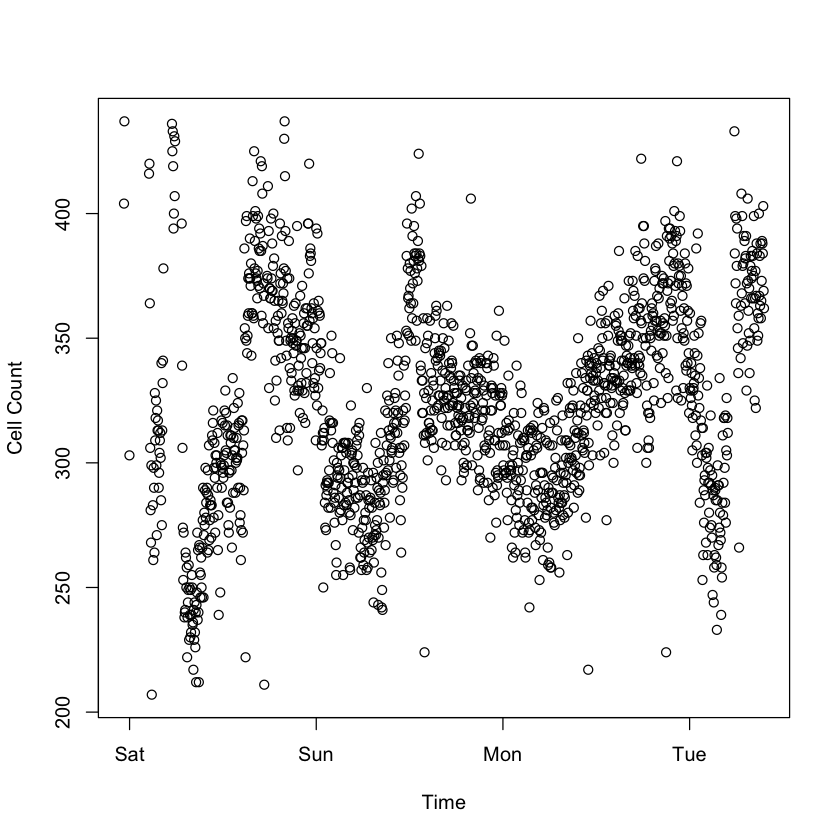

In [35]:
plot.time(db, "synecho", 450, 200)

## Print 3D with Time and Latitude 

In [17]:
library(scatterplot3d)

In [20]:
plot.time.lat <- function(db, population, upper.limit, lower.limit) {
    table <- get.stat.table(db)
    population.list <- subset(table, pop == population)
    population.list.filtered <- population.list[(population.list$n_count < upper.limit),]
    population.list.filtered <- population.list.filtered[(population.list.filtered$n_count > lower.limit),]
    
    lat <- population.list.filtered$lat
    time.stat <- as.POSIXct(population.list.filtered$time, format = "%FT%T", tz = "GMT")
    pop.count <- population.list.filtered$n_count 
    scatterplot3d(time.stat, lat, pop.count, xlab="Time", ylab="Lat", zlab="Cell Count")
} 

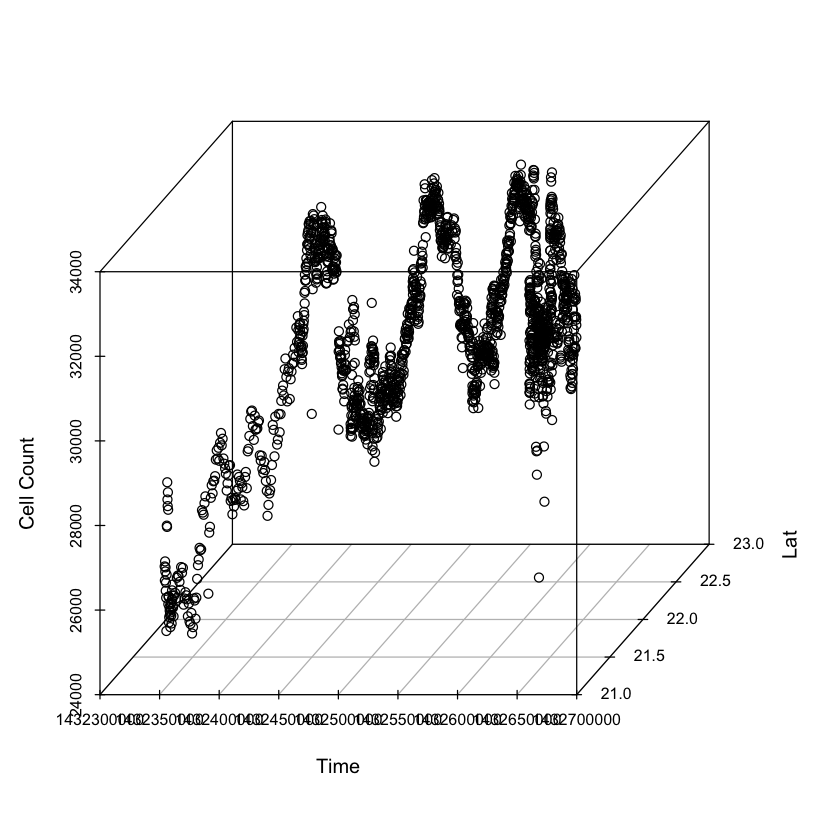

In [22]:
plot.time.lat(db, "prochloro", 45000, 24000)

## Time Series

In [17]:
table <- get.stat.table(db)
population.list <- subset(table, pop == "prochloro")
population.list.filtered <- population.list[(population.list$n_count < 450000),]
population.list.filtered <- population.list.filtered[(population.list.filtered$n_count > 24000),]
time.stat <- as.POSIXct(population.list.filtered$time, format = "%FT%T", tz = "GMT")
pop.count <- population.list.filtered$n_count 

In [40]:
ts <- ts(data = pop.count, frequency = 4)

## Forecast Package

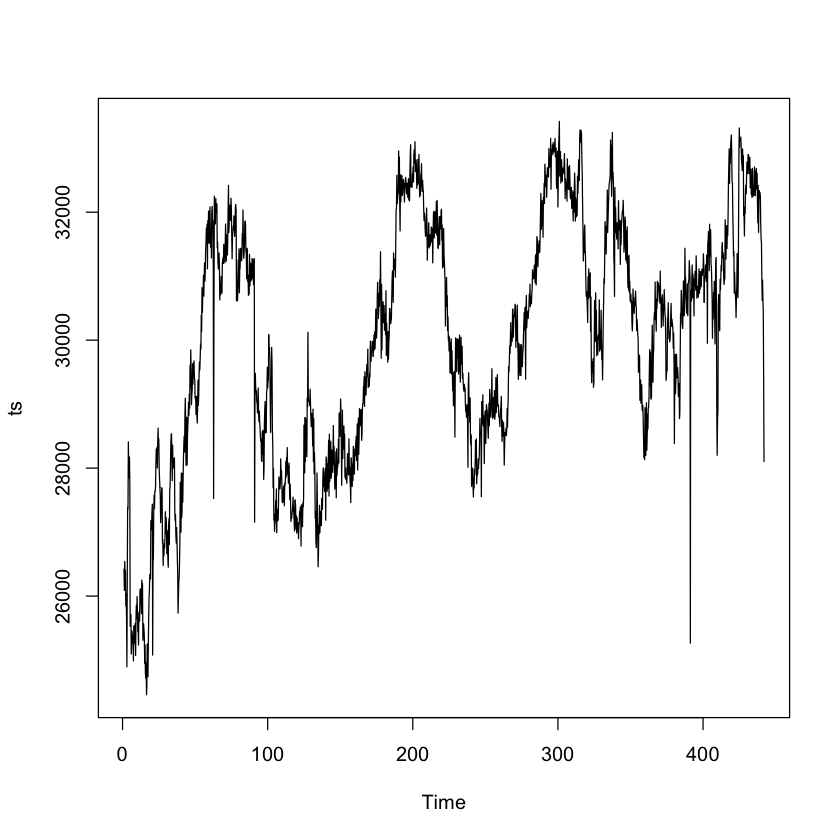

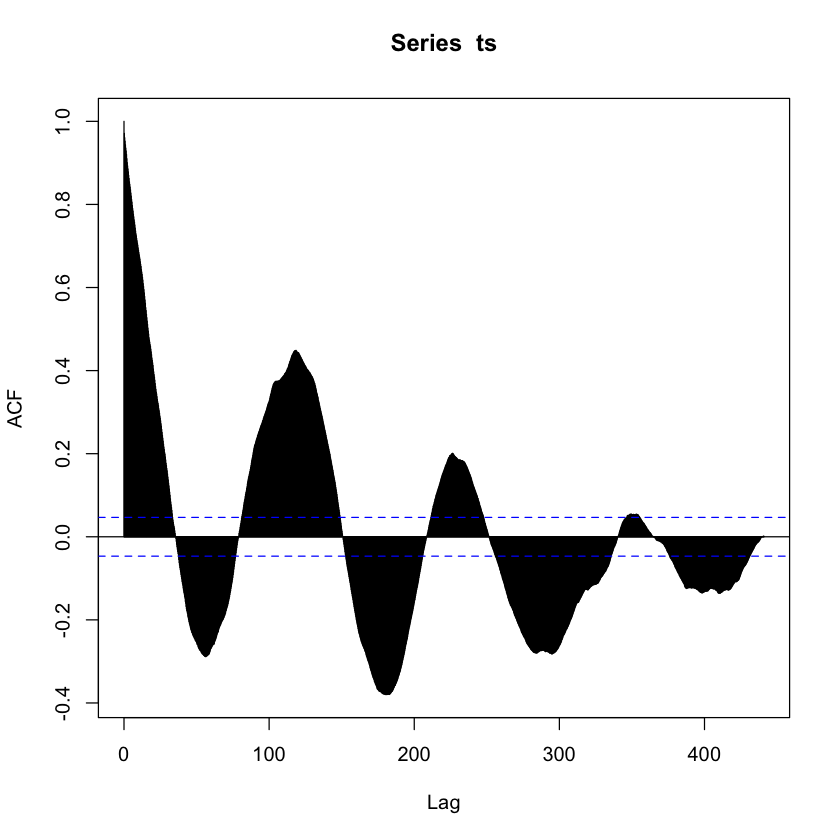

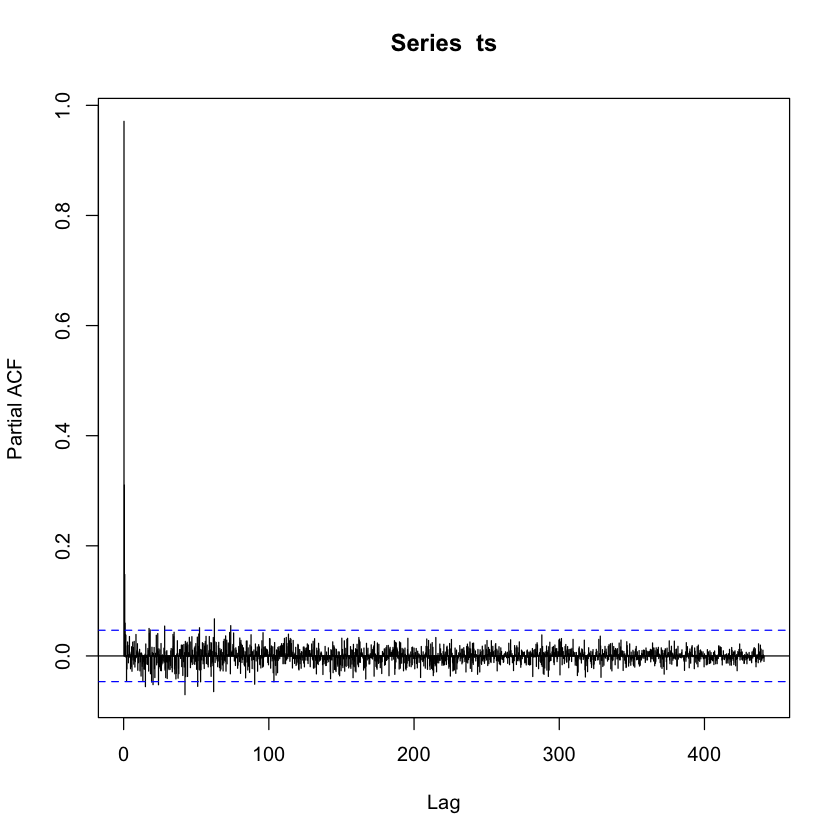

In [43]:
library(forecast)
fit <- ets(ts)
fc <- forecast(fit)

plot(ts)

acf(ts, c("correlation"))
pacf(ts, c("correlation"))

## Signal Package

In [24]:
library(signal)


Attaching package: ‘signal’

The following objects are masked from ‘package:stats’:

    filter, poly



ERROR: Error in filter.default(time.stat, method = c("convolution"), sides = 1): argument "x" is missing, with no default


In [36]:
ts <- ts(data = pop.count, frequency = 500)
filter(x, filter , method = c("convultion"), sides = 1)

ERROR: Error in filter.default(x = ts, filter = 1, method = c("convultion"), : argument "filt" is missing, with no default
